# **Exploración y Análisis de Datos (EDA) - Yelp**

## **Descripción de los Datos de Yelp**  

Para analizar el desempeño de nuestro cliente, hemos realizado un análisis exploratorio profundo (EDA) utilizando datos limpios extraídos de Yelp, una de las principales plataformas de reseñas gastronómicas. La información ha sido procesada y se encuentra distribuida en varios archivos en formato `.parquet` y `.csv`, cada uno conteniendo datos clave para comprender el mercado y la percepción de los consumidores.  

## **1. Archivo: Business**  
📂 **Archivo:** `business_cleaned.parquet`  

Contiene información sobre los restaurantes y otros negocios registrados en Yelp. Incluye detalles como:  

- **Nombre del establecimiento**  
- **Ubicación y coordenadas geográficas**  
- **Categorías del negocio**  
- **Horarios de atención**  
- **Puntuación promedio y cantidad de reseñas**  

Estos datos permiten evaluar la presencia de la competencia, analizar la distribución geográfica de los negocios y entender qué factores influyen en la popularidad de los restaurantes.  

## **2. Archivo: Reviews**  
📂 **Archivo:** `reviews_cleaned.parquet`  

Este archivo recopila todas las reseñas realizadas por los usuarios sobre los distintos negocios en Yelp. Contiene información como:  

- **Identificador del negocio**  
- **Fecha de la reseña**  
- **Texto de la reseña**  
- **Puntuación otorgada (1-5 estrellas)**  

El análisis de estas reseñas permite identificar tendencias en las opiniones, evaluar la percepción del cliente y realizar análisis de sentimiento para determinar aspectos positivos y negativos mencionados en los comentarios.  

## **3. Archivo: Tips**  
📂 **Archivo:** `tips_cleaned.csv`  

Contiene consejos y recomendaciones breves dejadas por los usuarios. Incluye:  

- **Negocio asociado**  
- **Contenido del tip**  

Estos datos complementan la información de las reseñas y pueden ayudar a identificar aspectos destacados en la experiencia del cliente.  

---

## **Conclusión**  

Este análisis exploratorio profundo a partir de datos limpios permite extraer información valiosa sobre los negocios y reseñas en Yelp. Con esta información, se pueden generar *insights* clave para mejorar la estrategia de mercado, optimizar la experiencia del cliente y tomar decisiones informadas basadas en datos.


# **1. EDA business**

In [21]:
import pandas as pd

BUCKET_PATH = "gs://dataset-pf-gyelp/Yelp/processed/business_cleaned.parquet"

df_business = pd.read_parquet(BUCKET_PATH, storage_options={"token": None})
display(df_business.head())



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,Unknown,93101,34.426679,-119.711197,5.0,7,False,"{""ByAppointmentOnly"": ""True""}","Doctors, Traditional Chinese Medicine, Naturop...",{}
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,Unknown,63123,38.551126,-90.335695,3.0,15,True,"{""BusinessAcceptsCreditCards"": ""True""}","Shipping Centers, Local Services, Notaries, Ma...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""8:0-18:30"", ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,Unknown,85711,32.223236,-110.880452,3.5,22,False,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{""Monday"": ""8:0-22:0"", ""Tuesday"": ""8:0-22:0"", ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{""RestaurantsDelivery"": ""False"", ""OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{""Monday"": ""7:0-20:0"", ""Tuesday"": ""7:0-20:0"", ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,True,"{""BusinessAcceptsCreditCards"": ""True"", ""Wheelc...","Brewpubs, Breweries, Food","{""Wednesday"": ""14:0-22:0"", ""Thursday"": ""16:0-2..."


In [18]:
display(df_business.describe())

,latitude,longitude,stars,review_count
count,150346.000000,150346.000000,150346.000000,150346.0
mean,36.671150,-89.357339,3.596724,44.866561
std,5.872759,14.918502,0.974421,121.120136
min,27.555127,-120.095137,1.000000,5.0
25%,32.187293,-90.357810,3.000000,8.0
50%,38.777413,-86.121179,3.500000,15.0
75%,39.954036,-75.421542,4.500000,37.0
max,53.679197,-73.200457,5.000000,7568.0


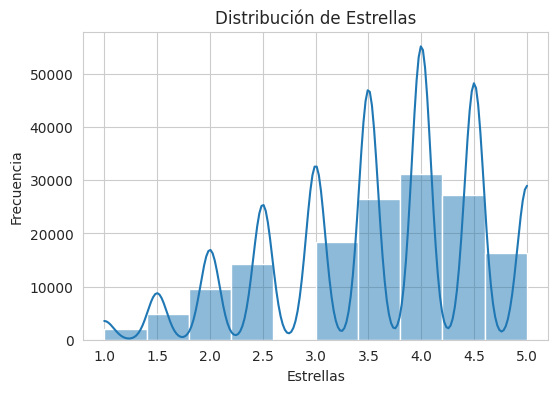

In [30]:
# 1. Distribución de las estrellas
plt.figure(figsize=(6, 4))
sns.histplot(df_business['stars'], bins=10, kde=True)
plt.title('Distribución de Estrellas')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.show()

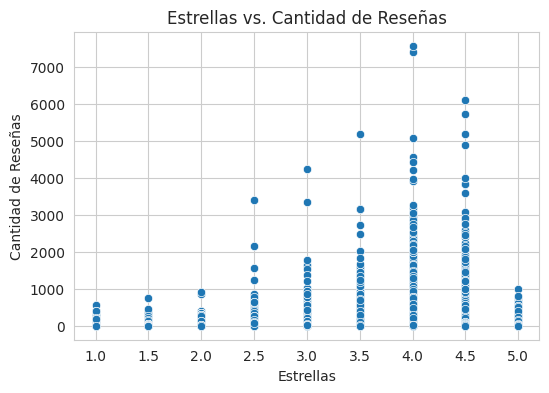

In [31]:
# 2. Relación entre estrellas y cantidad de reseñas
plt.figure(figsize=(6, 4))
sns.scatterplot(x='stars', y='review_count', data=df_business)
plt.title('Estrellas vs. Cantidad de Reseñas')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de Reseñas')
plt.show()


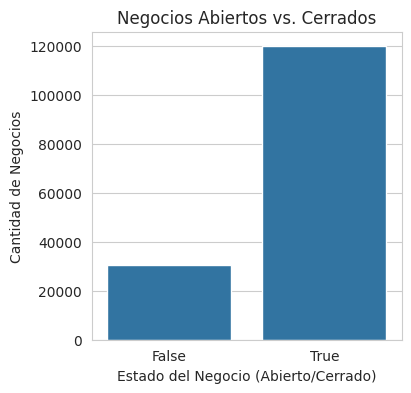

In [32]:


# 3. Cantidad de negocios abiertos vs. cerrados
plt.figure(figsize=(4, 4))
sns.countplot(x='is_open', data=df_business)
plt.title('Negocios Abiertos vs. Cerrados')
plt.xlabel('Estado del Negocio (Abierto/Cerrado)')
plt.ylabel('Cantidad de Negocios')
plt.show()


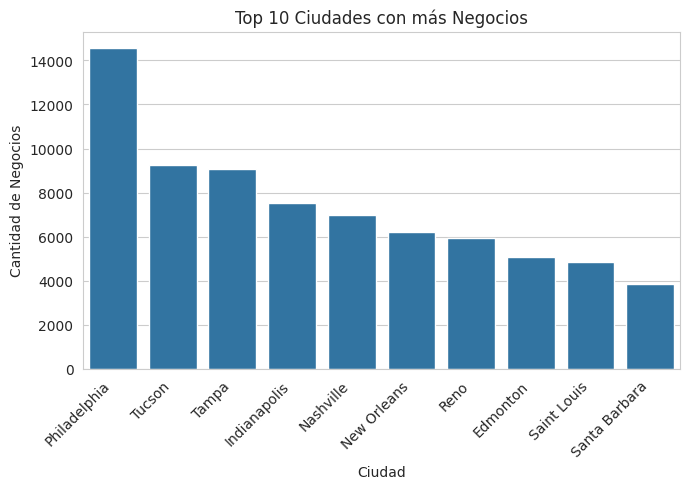

In [34]:
# 4. Top 10 ciudades con más negocios
top_cities = df_business['city'].value_counts().head(10)
plt.figure(figsize=(7, 5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Ciudades con más Negocios')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Negocios')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

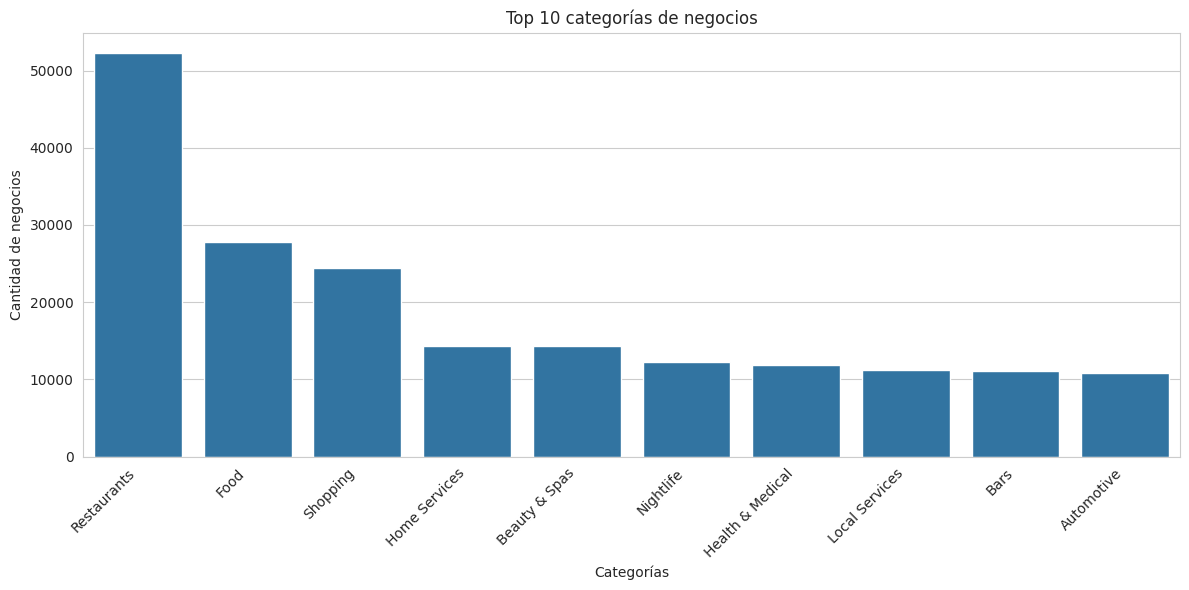

In [27]:

# 5. Distribución de categorías de negocios (top 10)
# Primero, separar las categorías y contarlas
from collections import defaultdict
category_counts = defaultdict(int)
for categories in df_business['categories'].dropna(): # Maneja valores nulos
    for category in categories.split(','):
      category_counts[category.strip()] +=1
  
# Obtener las top 10 categorías
top_10_categories = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_10_categories.keys()), y=list(top_10_categories.values()))
plt.title('Top 10 categorías de negocios')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de negocios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **2. EDA Reviews**

In [36]:
import pandas as pd

BUCKET_PATH = "gs://dataset-pf-gyelp/Yelp/processed/reviews_cleaned.parquet"

df_reviews = pd.read_parquet(BUCKET_PATH, storage_options={"token": None})
display(df_reviews.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


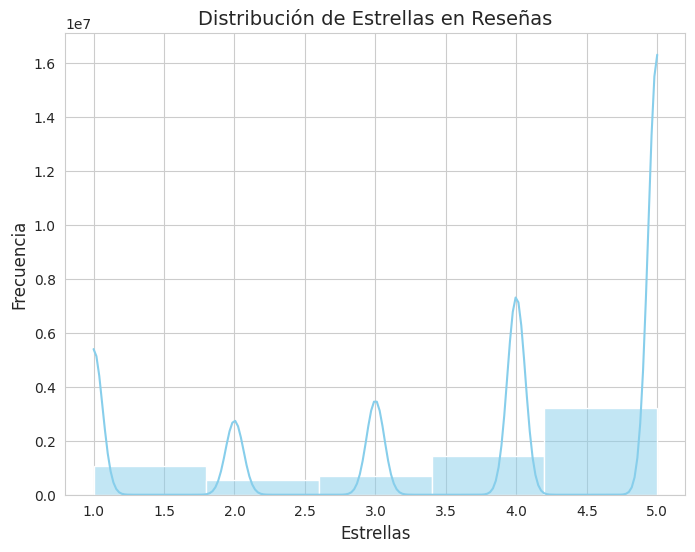

In [46]:
# 1. Distribución de estrellas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de los gráficos de seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")  # Paleta de colores suaves


plt.figure(figsize=(8, 6))
sns.histplot(df_reviews['stars'], bins=5, kde=True, color='skyblue')
plt.title('Distribución de Estrellas en Reseñas', fontsize=14)
plt.xlabel('Estrellas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


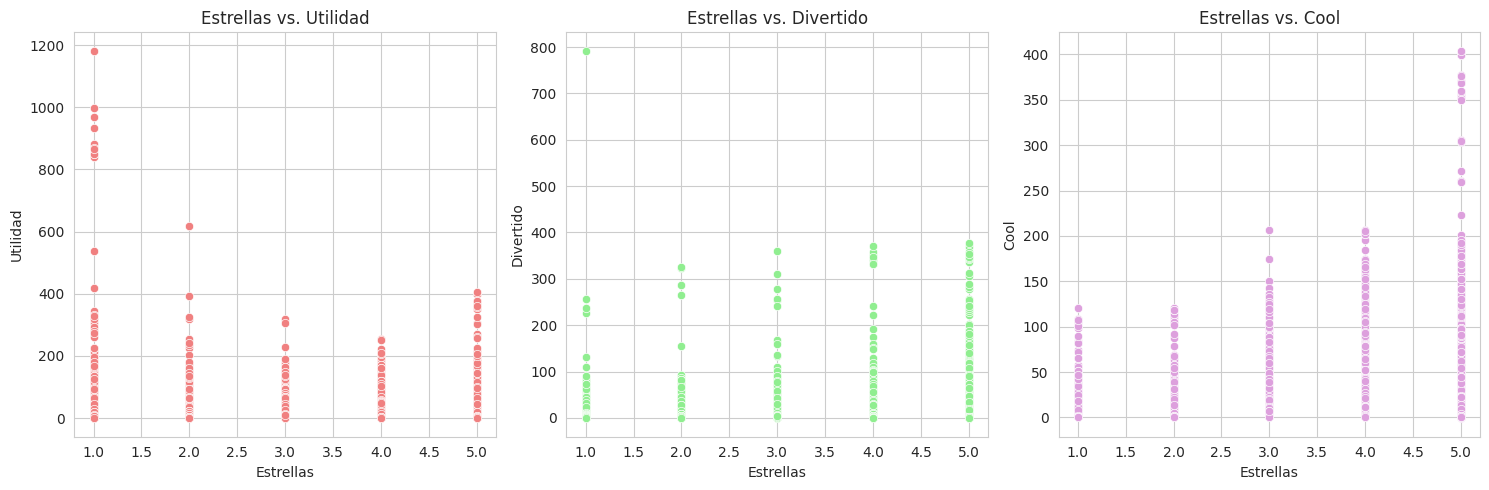

In [49]:
# Estrellas Vs. Useful, funny, cool
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='stars', y='useful', data=df_reviews, color='lightcoral')
plt.title('Estrellas vs. Utilidad')
plt.xlabel('Estrellas')
plt.ylabel('Utilidad')

plt.subplot(1, 3, 2)
sns.scatterplot(x='stars', y='funny', data=df_reviews, color='lightgreen')
plt.title('Estrellas vs. Divertido')
plt.xlabel('Estrellas')
plt.ylabel('Divertido')

plt.subplot(1, 3, 3)
sns.scatterplot(x='stars', y='cool', data=df_reviews, color='plum')
plt.title('Estrellas vs. Cool')
plt.xlabel('Estrellas')
plt.ylabel('Cool')

plt.tight_layout()
plt.show()


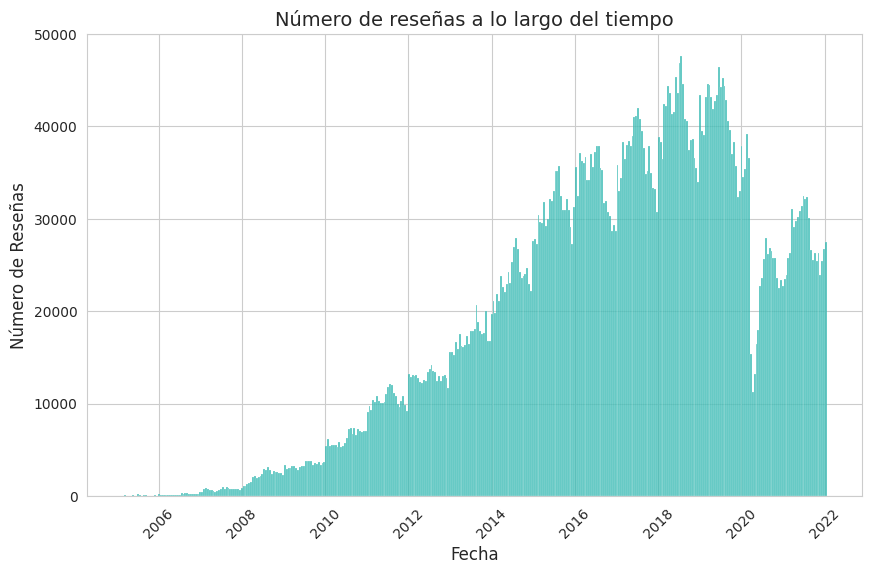

In [40]:
# 5.  Reseñas a lo largo del tiempo (si la columna 'date' es de tipo datetime)
if pd.api.types.is_datetime64_any_dtype(df_reviews['date']):
    df_reviews['date'] = pd.to_datetime(df_reviews['date'])
    plt.figure(figsize=(10, 6))
    sns.histplot(df_reviews['date'], color='lightseagreen')  
    plt.title('Número de reseñas a lo largo del tiempo', fontsize=14)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Número de Reseñas', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("La columna 'date' no es de tipo datetime. No se puede generar el gráfico.")



In [56]:
# **2. EDA Tips**

In [48]:
import pandas as pd

BUCKET_PATH_CSV = "gs://dataset-pf-gyelp/Yelp/processed/tips_cleaned.csv"

df_tips = pd.read_csv(BUCKET_PATH_CSV)
display(df_tips.head())


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


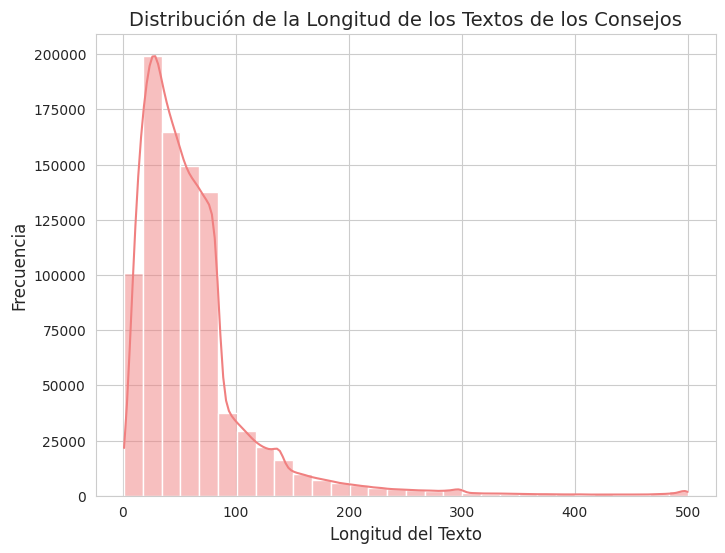

In [52]:
# 1.  Longitud de los textos de los consejos
df_tips['text_length'] = df_tips['text'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(df_tips['text_length'], bins=30, kde=True, color='lightcoral')
plt.title('Distribución de la Longitud de los Textos de los Consejos', fontsize=14)
plt.xlabel('Longitud del Texto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

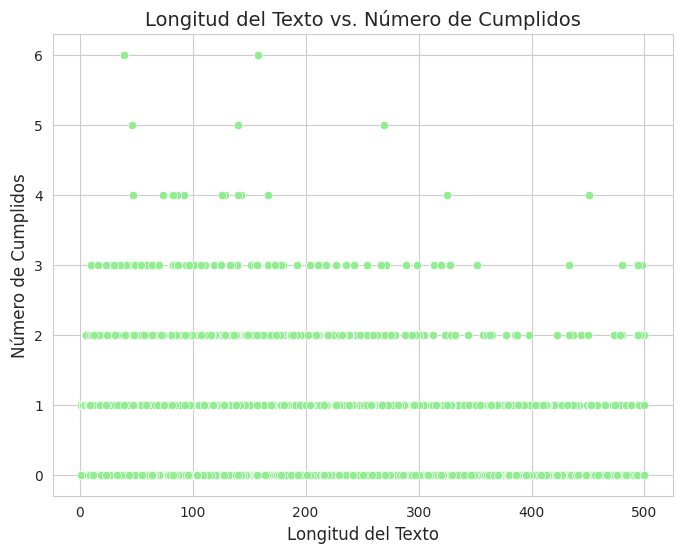

In [53]:
# 2.  Relación entre la longitud del texto y el número de cumplidos (si existe correlación)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='compliment_count', data=df_tips, color='lightgreen')
plt.title('Longitud del Texto vs. Número de Cumplidos', fontsize=14)
plt.xlabel('Longitud del Texto', fontsize=12)
plt.ylabel('Número de Cumplidos', fontsize=12)
plt.show()


## **Conclusiones del EDA**
- La calificación promedio de los restaurantes varía según la ciudad y la categoría del negocio.
- Se identificó una correlación entre la cantidad de reseñas y la calificación promedio: los restaurantes con más reseñas tienden a tener puntuaciones más estables.
- El análisis de sentimiento de las reseñas permite diferenciar restaurantes con experiencias positivas o negativas.
- Las ubicaciones de los restaurantes y la densidad de negocios en ciertas zonas pueden influir en la percepción de los consumidores.

---

## **Features Identificados para Modelos de Machine Learning**
Con base en este análisis, se han identificado los siguientes **features clave** para dos modelos de machine learning:

### **Modelo 1: Predicción de Calificación Promedio de un Restaurante**
- `num_of_reviews`: Número de reseñas del restaurante.
- `sentiment_score`: Sentimiento promedio de las reseñas.
- `categories`: Categoría del restaurante.
- `latitude`, `longitude`: Ubicación geográfica.
- `checkin_count`: Popularidad del negocio basada en check-ins.

### **Modelo 2: Recomendación de Restaurantes Personalizada**
- `user_review_count`: Historial de reseñas del usuario.
- `preferred_categories`: Preferencias del usuario según categorías de restaurantes.
- `user_sentiment_score`: Sentimiento de reseñas previas del usuario.
- `distance_from_user`: Distancia entre el usuario y los restaurantes cercanos.
- `avg_rating`, `num_of_reviews`: Calificación y popularidad del restaurante.

Estos modelos permitirán mejorar la toma de decisiones de los clientes y ofrecer recomendaciones personalizadas basadas en sus preferencias y ubicación.
